In [2]:
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
bike_df = pd.read_csv('../data/bike_df')
foursq_df = pd.read_csv('../data/foursquare_df_clean')
yelp_df = pd.read_csv('../data/yelp_df_clean')

In [4]:
# Exploring Yelp and Foursquare dataframes before join.
print(f'Foursquare shape: {foursq_df.shape}/n Yelp shape: {yelp_df.shape}')

Foursquare shape: (18481, 6)/n Yelp shape: (18833, 8)


In [5]:
yelp_df.head()

,Category,Name,Rating,Reviews,Latitude,Longitude,Assc Bike Lat,Assc Bike Long
0,Arts & Entertainment,Aperture Coffee Bar,4.0,122,49.263204,-123.110470,49.262487,-123.114397
1,Arts & Entertainment,Evolve Virtual Reality,4.0,13,49.263326,-123.113399,49.262487,-123.114397
2,Arts & Entertainment,"Under the Piano - Sound Spa for Body, Mind & Soul",5.0,9,49.282239,-123.138425,49.262487,-123.114397
3,Arts & Entertainment,V & G Entertainment,5.0,10,49.260769,-123.092392,49.262487,-123.114397
4,Arts & Entertainment,Hidden Wonders,5.0,12,49.202762,-122.909860,49.262487,-123.114397


In [6]:
yelp_df.dtypes

Category           object
Name               object
Rating            float64
Reviews             int64
Latitude          float64
Longitude         float64
Assc Bike Lat     float64
Assc Bike Long    float64
dtype: object

In [7]:
foursq_df.dtypes

Category           object
Name               object
Latitude          float64
Longitude         float64
Assc Bike Lat     float64
Assc Bike Long    float64
dtype: object

In [8]:
foursq_df.head()

,Category,Name,Latitude,Longitude,Assc Bike Lat,Assc Bike Long
0,Arts & Entertainment,Yuk Yuk's Comedy Club,49.259982,-123.115276,49.262487,-123.114397
1,Arts & Entertainment,Evolve Virtual Reality,49.263318,-123.113533,49.262487,-123.114397
2,Arts & Entertainment,E-Exit Canada,49.262489,-123.111759,49.262487,-123.114397
3,Arts & Entertainment,Bard on the Beach Shakespeare Festival Adminis...,49.263045,-123.113996,49.262487,-123.114397
4,Arts & Entertainment,EXIT West Broadway,49.263328,-123.111344,49.262487,-123.114397


In [9]:
foursq_df['Longitude']= foursq_df['Longitude'].round(3)
foursq_df['Latitude'] = foursq_df['Latitude'].round(3)
yelp_df['Longitude']= yelp_df['Longitude'].round(3)
yelp_df['Latitude'] = yelp_df['Latitude'].round(3)

In [10]:
POI_df = pd.merge(foursq_df, yelp_df, how='outer', on=['Category', 'Name', 'Latitude', 'Longitude', 'Assc Bike Lat', 'Assc Bike Long'], indicator=True)

In [11]:
POI_df.shape

(35623, 9)

In [12]:
# Additional cleaning for POI_df
POI_df.sort_values(by=['Assc Bike Lat', 'Category', 'Name', '_merge']).tail(50)

,Category,Name,Latitude,Longitude,Assc Bike Lat,Assc Bike Long,Rating,Reviews,_merge
25002,"Landmarks, Parks & Sports",Nine O'Clock Gun,49.299,-123.117,49.298657,-123.121176,4.5,8.0,right_only
25008,"Landmarks, Parks & Sports",Port of Vancouver Monument,49.301,-123.117,49.298657,-123.121176,4.0,1.0,right_only
25001,"Landmarks, Parks & Sports",Shore to Shore,49.299,-123.121,49.298657,-123.121176,5.0,1.0,right_only
25009,Retail,At the Totem Poles,49.299,-123.121,49.298657,-123.121176,5.0,1.0,right_only
7163,Arts & Entertainment,4-D Experience,49.301,-123.131,49.299292,-123.130281,NaN,NaN,left_only
7162,Arts & Entertainment,Malkin Bowl,49.299,-123.133,49.299292,-123.130281,NaN,NaN,left_only
7164,Arts & Entertainment,Penguin Point,49.301,-123.132,49.299292,-123.130281,NaN,NaN,left_only
24981,Arts & Entertainment,Rose Garden,49.300,-123.134,49.299292,-123.130281,3.5,5.0,right_only
7165,Arts & Entertainment,Stanley Park Painters Circle,49.298,-123.132,49.299292,-123.130281,NaN,NaN,left_only
7166,Arts & Entertainment,Theatre Under the Stars,49.300,-123.134,49.299292,-123.130281,NaN,NaN,left_only


In [13]:
POI_df_dupes = POI_df.copy()
POI_df_dupes['Name'] = POI_df_dupes['Name'].str.lower()
POI_df_dupes.drop_duplicates(subset=['Assc Bike Lat', 'Category','Name'], inplace=True)
POI_df_dupes['Name'] = POI_df_dupes['Name'].str.title()

In [14]:
POI_df_dupes.shape

(33415, 9)

In [15]:
POI_df_dupes.sort_values(by=['Assc Bike Lat', 'Category', 'Name', '_merge']).tail(50)

,Category,Name,Latitude,Longitude,Assc Bike Lat,Assc Bike Long,Rating,Reviews,_merge
25005,"Landmarks, Parks & Sports",Harry Jerome Monument,49.298,-123.119,49.298657,-123.121176,4.5,4.0,right_only
7204,"Landmarks, Parks & Sports",Harry Jerome Statue,49.298,-123.119,49.298657,-123.121176,NaN,NaN,left_only
25007,"Landmarks, Parks & Sports",Hmcs Discovery,49.296,-123.123,49.298657,-123.121176,4.0,1.0,right_only
7202,"Landmarks, Parks & Sports",Nine O'Clock Gun,49.298,-123.117,49.298657,-123.121176,NaN,NaN,left_only
25008,"Landmarks, Parks & Sports",Port Of Vancouver Monument,49.301,-123.117,49.298657,-123.121176,4.0,1.0,right_only
25001,"Landmarks, Parks & Sports",Shore To Shore,49.299,-123.121,49.298657,-123.121176,5.0,1.0,right_only
25009,Retail,At The Totem Poles,49.299,-123.121,49.298657,-123.121176,5.0,1.0,right_only
7163,Arts & Entertainment,4-D Experience,49.301,-123.131,49.299292,-123.130281,NaN,NaN,left_only
7162,Arts & Entertainment,Malkin Bowl,49.299,-123.133,49.299292,-123.130281,NaN,NaN,left_only
7164,Arts & Entertainment,Penguin Point,49.301,-123.132,49.299292,-123.130281,NaN,NaN,left_only


In [16]:
POI_df = POI_df_dupes.copy()
del POI_df_dupes

In [40]:
full_df = pd.merge(bike_df, POI_df, left_on=['Latitude', 'Longitude'], right_on=['Assc Bike Lat', 'Assc Bike Long'], how='left')

full_df.drop(columns=['Coord_String', 'Assc Bike Lat', 'Assc Bike Long'], inplace=True)
full_df.rename(columns={'Latitude_y': 'POI Latitude', 'Longitude_y': 'POI Longitude', 'Latitude_x': 'Station Latitude', 'Longitude_x': 'Station Longitude'}, inplace=True)

merge_dict = {'left_only': 'Foursquare', 'right_only': 'Yelp', 'both': 'both'}
full_df.replace({'_merge': merge_dict}, inplace=True) 

full_df.head()

,Station_name,Station Latitude,Station Longitude,Bikes,Category,Name,POI Latitude,POI Longitude,Rating,Reviews,_merge
0,10th & Cambie,49.262487,-123.114397,35,Arts & Entertainment,Yuk Yuk'S Comedy Club,49.260,-123.115,NaN,NaN,Foursquare
1,10th & Cambie,49.262487,-123.114397,35,Arts & Entertainment,Evolve Virtual Reality,49.263,-123.114,NaN,NaN,Foursquare
2,10th & Cambie,49.262487,-123.114397,35,Arts & Entertainment,E-Exit Canada,49.262,-123.112,NaN,NaN,Foursquare
3,10th & Cambie,49.262487,-123.114397,35,Arts & Entertainment,Bard On The Beach Shakespeare Festival Adminis...,49.263,-123.114,NaN,NaN,Foursquare
4,10th & Cambie,49.262487,-123.114397,35,Arts & Entertainment,Exit West Broadway,49.263,-123.111,NaN,NaN,Foursquare


In [41]:
print(full_df.shape)
print(full_df['Station_name'].value_counts())

(26980, 11)
Robson & Granville     536
Granville & Georgia    536
Seymour & Cordova      501
Robson & Hornby        485
Dunsmuir & Richards    478
                      ... 
Windsor & 14th           3
Burrard & 14th           3
Cypress & 16th           2
29th & Cambie            2
15th & Knight            1
Name: Station_name, Length: 241, dtype: int64


In [48]:
full_df.isna().sum()

Station_name             0
Station Latitude         0
Station Longitude        0
Bikes                    0
Category                 0
Name                     0
POI Latitude           155
POI Longitude          155
Rating               16366
Reviews              16366
_merge                   0
dtype: int64

In [43]:
full_df.groupby(['Station_name','Category']).mean()

Station Latitude  \
Station_name                                       Category                                      
10th & Cambie                                      Arts & Entertainment              49.262487   
                                                   Bars, Restaurants & Cafes         49.262487   
                                                   Landmarks, Parks & Sports         49.262487   
                                                   Municipal                         49.262487   
                                                   Retail                            49.262487   
...                                                                                        ...   
šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art G... Bars, Restaurants & Cafes         49.283227   
                                                   Landmarks, Parks & Sports         49.283227   
                                                   Municipal                         49.283227   
                                                   Retail                            49.283227   
                                                   Schools                           49.283227   

                                                                              Station Longitude  \
Station_name                                       Category                                       
10th & Cambie                                      Arts & Entertainment             -123.114397   
                                                   Bars, Restaurants & Cafes        -123.114397   
                                                   Landmarks, Parks & Sports        -123.114397   
                                                   Municipal                        -123.114397   
                                                   Retail                           -123.114397   
...                                                                                         ...   
šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art G... Bars, Restaurants & Cafes        -123.120523   
                                                   Landmarks, Parks & Sports        -123.120523   
                                                   Municipal                        -123.120523   
                                                   Retail                           -123.120523   
                                                   Schools                          -123.120523   

                                                                              Bikes  \
Station_name                                       Category                           
10th & Cambie                                      Arts & Entertainment          35   
                                                   Bars, Restaurants & Cafes     35   
                                                   Landmarks, Parks & Sports     35   
                                                   Municipal                     35   
                                                   Retail                        35   
...                                                                             ...   
šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art G... Bars, Restaurants & Cafes     28   
                                                   Landmarks, Parks & Sports     28   
                                                   Municipal                     28   
                                                   Retail                        28   
                                                   Schools                       28   

                                                                              POI Latitude  \
Station_name                                       Category                                  
10th & Cambie                                      Arts & Entertainment          49.240654   
                                                   Bars, Restaurants & Cafes     49.263312   
       

In [103]:
# Create table with category totals for each station.
sum_df = pd.DataFrame(full_df.groupby(['Station_name', 'Bikes'])['Category'].value_counts())
sum_df = sum_df.unstack(level=-1)
sum_df = sum_df.droplevel(0, axis=1)
sum_df.reset_index(inplace=True)


In [124]:
sum_df['Total POIs'] = sum_df[['Arts & Entertainment', 'Bars, Restaurants & Cafes', 'Landmarks, Parks & Sports', 'Municipal', 'Retail', 'Schools']].sum(axis=1)

In [125]:
sum_df

Category,Station_name,Bikes,Arts & Entertainment,"Bars, Restaurants & Cafes","Landmarks, Parks & Sports",Municipal,Retail,Schools,Total POIs
0,10th & Cambie,35,26.0,93.0,76.0,4.0,99.0,4.0,302.0
1,10th & Columbia,14,7.0,24.0,14.0,0.0,19.0,0.0,64.0
2,10th & Commercial,26,8.0,41.0,8.0,2.0,27.0,1.0,87.0
3,10th & Fraser,14,4.0,19.0,3.0,0.0,9.0,0.0,35.0
4,10th & Granville,14,20.0,62.0,26.0,2.0,77.0,1.0,188.0
...,...,...,...,...,...,...,...,...,...
236,Yaletown-Roundhouse Station,16,37.0,129.0,71.0,2.0,88.0,2.0,329.0
237,Yew & Broadway,18,4.0,32.0,34.0,1.0,22.0,2.0,95.0
238,York & Yew,20,1.0,18.0,5.0,0.0,5.0,0.0,29.0
239,Yukon & 6th,18,28.0,74.0,63.0,1.0,74.0,2.0,242.0


In [126]:
sum_df.describe()

Category,Bikes,Arts & Entertainment,"Bars, Restaurants & Cafes","Landmarks, Parks & Sports",Municipal,Retail,Schools,Total POIs
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,18.887967,12.265560,41.585062,19.622407,1.630705,34.834025,2.012448,111.950207
std,5.394432,15.949269,38.733411,19.612989,2.816716,41.559163,5.306821,113.563994
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15.000000,2.000000,9.000000,6.000000,0.000000,6.000000,0.000000,24.000000
50%,18.000000,7.000000,30.000000,12.000000,1.000000,21.000000,0.000000,78.000000
75%,20.000000,14.000000,65.000000,28.000000,2.000000,45.000000,2.000000,159.000000
max,40.000000,78.000000,151.000000,87.000000,21.000000,219.000000,42.000000,536.000000


In [127]:
sum_df.isna().sum()

Category
Station_name                 0
Bikes                        0
Arts & Entertainment         0
Bars, Restaurants & Cafes    0
Landmarks, Parks & Sports    0
Municipal                    0
Retail                       0
Schools                      0
Total POIs                   0
dtype: int64

In [128]:
sum_df.fillna(0, inplace=True)
sum_df.describe()

Category,Bikes,Arts & Entertainment,"Bars, Restaurants & Cafes","Landmarks, Parks & Sports",Municipal,Retail,Schools,Total POIs
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,18.887967,12.265560,41.585062,19.622407,1.630705,34.834025,2.012448,111.950207
std,5.394432,15.949269,38.733411,19.612989,2.816716,41.559163,5.306821,113.563994
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15.000000,2.000000,9.000000,6.000000,0.000000,6.000000,0.000000,24.000000
50%,18.000000,7.000000,30.000000,12.000000,1.000000,21.000000,0.000000,78.000000
75%,20.000000,14.000000,65.000000,28.000000,2.000000,45.000000,2.000000,159.000000
max,40.000000,78.000000,151.000000,87.000000,21.000000,219.000000,42.000000,536.000000


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

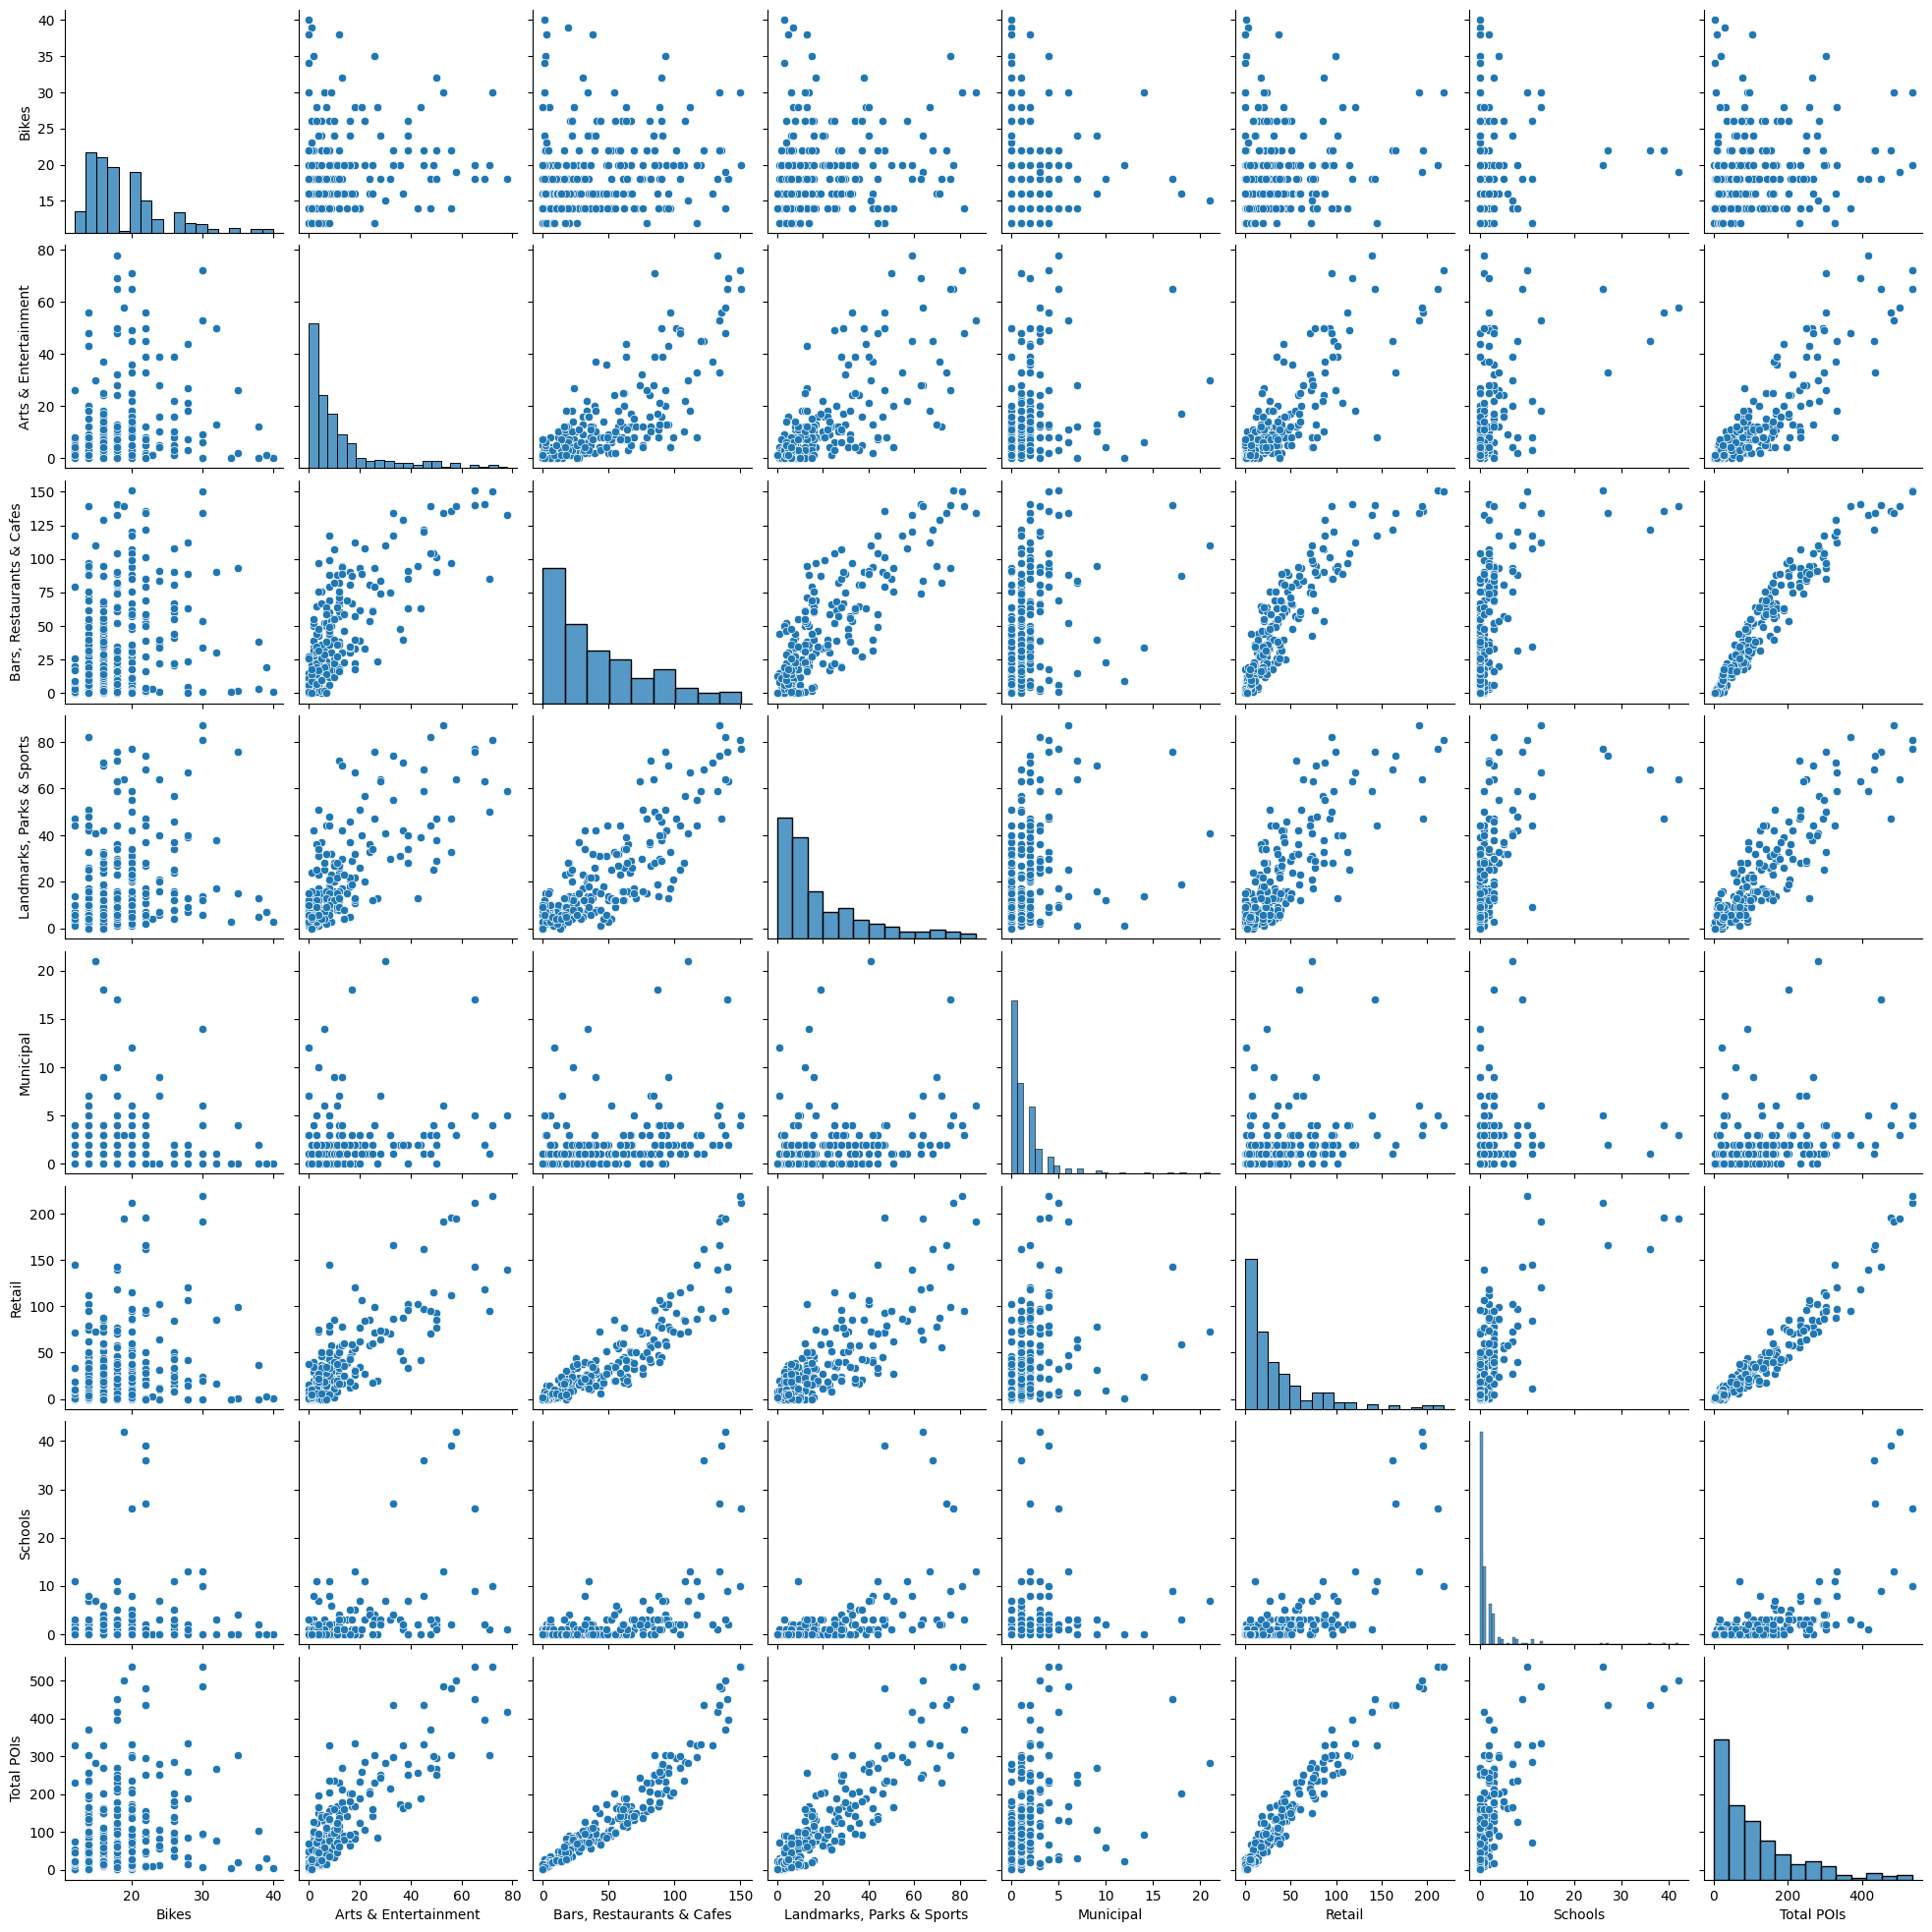

In [148]:
categories = ['Arts & Entertainment', 'Bars, Restaurants & Cafes', 'Landmarks, Parks & Sports', 'Municipal', 'Retail', 'Schools', 'Total POIs']
sns.pairplot(sum_df)

<Axes: xlabel='Category', ylabel='Category'>

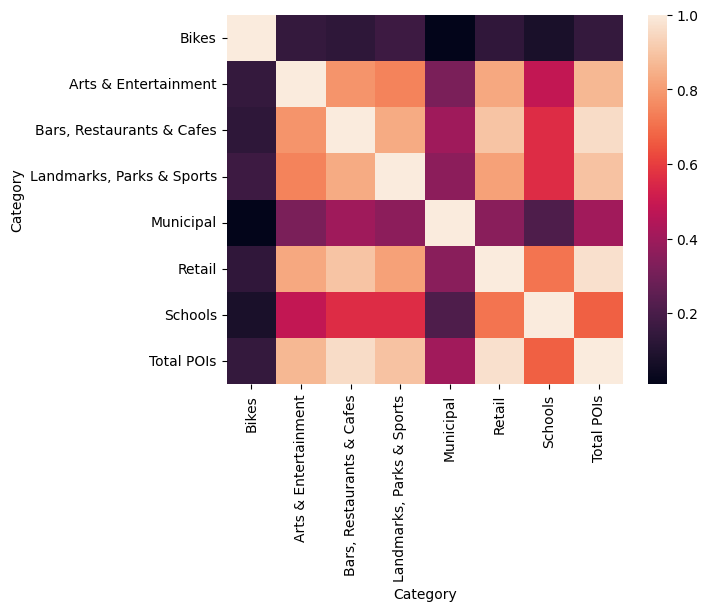

In [129]:
sns.heatmap(sum_df.corr())

In [130]:
for category in categories:
    fig=px.scatter(sum_df, x=category, y='Bikes', hover_data = ['Station_name'])
    fig.update_layout(title_text=category, title_x=0.5)
    fig.show()

Based on these graphs, there does not appear to be any relationship between any of the types of POIs or the total number of POIs and the number of bikes at a station.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [131]:
sum_df.to_csv('../data/sum_df.csv', index=False)
full_df.to_csv('../data/full_df.csv', index=False)
POI_df.to_csv('../data/POI_df.csv', index=False)

In [132]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print('Connection to SQLite DB successful!')
    except Error as e:
        print(f'The error {e} occurred.')
    return connection

In [133]:
connection = create_connection('../data/city_bikes.sqlite')

Connection to SQLite DB successful!


In [135]:
def execute_query( connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print('Query executed successfully')
    except Error as e:
        print(f'The error {e} occurred.')

def execute_read_query(connection, query):
    cursor = connection.cursor()
    results = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f'The error {e} occured.')


In [138]:
POI_df.to_sql('POIs', connection, if_exists='replace')
bike_df.to_sql('Bike Stations', connection)

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\pandas\core\generic.py:2653: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



Look at the data before and after the join to validate your data.

In [139]:
POI_query = '''
SELECT * FROM POIs
'''
execute_read_query(connection, POI_query)

[(0,
  'Arts & Entertainment',
  "Yuk Yuk'S Comedy Club",
  49.26,
  -123.115,
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 (1,
  'Arts & Entertainment',
  'Evolve Virtual Reality',
  49.263,
  -123.114,
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 (2,
  'Arts & Entertainment',
  'E-Exit Canada',
  49.262,
  -123.112,
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 (3,
  'Arts & Entertainment',
  'Bard On The Beach Shakespeare Festival Administration',
  49.263,
  -123.114,
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 (4,
  'Arts & Entertainment',
  'Exit West Broadway',
  49.263,
  -123.111,
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 (5,
  'Bars, Restaurants & Cafes',
  'Moii Cafe',
  49.263,
  -123.115,
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 (6,
  'Bars, Restaurants & Cafes',
  'Marulilu Cafe',
  49.263,
  -123.114,
  49.262487,
  -123.114397,
  4.0,
  283.0,
  'both'),
 (7,
  'Bars, 

In [141]:
join_query = '''
SELECT  Category,
        Name,
        "Assc Bike Lat",
        "Assc Bike Long",
        Rating,
        Reviews,
        _merge
FROM POIs AS p
RIGHT JOIN "Bike Stations" AS b
ON p."Assc Bike Lat" = b.Latitude
AND p."Assc Bike Long" = b.Longitude
'''
execute_read_query(connection, join_query)

[('Arts & Entertainment',
  "Yuk Yuk'S Comedy Club",
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 ('Arts & Entertainment',
  'Evolve Virtual Reality',
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 ('Arts & Entertainment',
  'E-Exit Canada',
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 ('Arts & Entertainment',
  'Bard On The Beach Shakespeare Festival Administration',
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 ('Arts & Entertainment',
  'Exit West Broadway',
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 ('Bars, Restaurants & Cafes',
  'Moii Cafe',
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 ('Bars, Restaurants & Cafes',
  'Marulilu Cafe',
  49.262487,
  -123.114397,
  4.0,
  283.0,
  'both'),
 ('Bars, Restaurants & Cafes',
  'Aperture Coffee Bar',
  49.262487,
  -123.114397,
  None,
  None,
  'left_only'),
 ('Bars, Restaurants & Cafes',
  'Elysian Coffee Broadway',
  49.262487,
  -123.114397